In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from scipy.misc import toimage

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

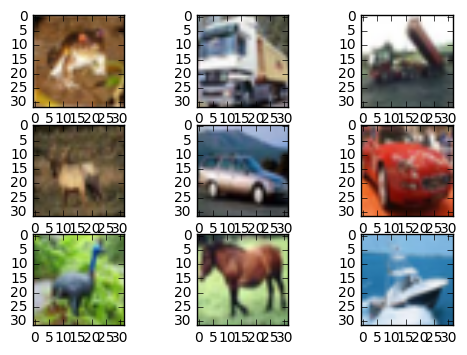

In [3]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(toimage(X_train[i]))
plt.show()

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

K.set_image_dim_ordering('tf')

In [4]:
seed = 7
np.random.seed(seed)

# Preprocessing Images

In [6]:
# Normalizing the input data before feeding into network
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# One hot encoding the output values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Simple Network

In [8]:
# Simple network for classification
def simple():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3),
                           border_mode='same', activation='relu',
                           W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    
    model.add(Convolution2D(32, 3, 3, activation='relu',
                           border_mode='same', W_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    epochs = 25
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    
    model.compile(loss='categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['accuracy'])
    print model.summary()
    return model

In [16]:
simpleCNN = simple()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_13 (Convolution2D) (None, 32, 32, 32)    896         convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
dropout_10 (Dropout)             (None, 32, 32, 32)    0           convolution2d_13[0][0]           
____________________________________________________________________________________________________
convolution2d_14 (Convolution2D) (None, 32, 32, 32)    9248        dropout_10[0][0]                 
____________________________________________________________________________________________________
maxpooling2d_7 (MaxPooling2D)    (None, 16, 16, 32)    0           convolution2d_14[0][0]           
___________________________________________________________________________________________

In [77]:
history = simpleCNN.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         nb_epoch=25,
         batch_size=32,
         verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
16s - loss: 1.7507 - acc: 0.3669 - val_loss: 1.4266 - val_acc: 0.4857
Epoch 2/25
16s - loss: 1.3984 - acc: 0.4985 - val_loss: 1.2379 - val_acc: 0.5585
Epoch 3/25
16s - loss: 1.2278 - acc: 0.5598 - val_loss: 1.1272 - val_acc: 0.6067
Epoch 4/25
15s - loss: 1.1011 - acc: 0.6055 - val_loss: 1.0624 - val_acc: 0.6194
Epoch 5/25
16s - loss: 1.0074 - acc: 0.6429 - val_loss: 1.0257 - val_acc: 0.6386
Epoch 6/25
16s - loss: 0.9334 - acc: 0.6678 - val_loss: 0.9870 - val_acc: 0.6531
Epoch 7/25
15s - loss: 0.8675 - acc: 0.6920 - val_loss: 0.9653 - val_acc: 0.6628
Epoch 8/25
16s - loss: 0.8038 - acc: 0.7166 - val_loss: 0.9529 - val_acc: 0.6693
Epoch 9/25
15s - loss: 0.7524 - acc: 0.7344 - val_loss: 0.9634 - val_acc: 0.6670
Epoch 10/25
16s - loss: 0.7023 - acc: 0.7522 - val_loss: 0.9433 - val_acc: 0.6784
Epoch 11/25
15s - loss: 0.6572 - acc: 0.7676 - val_loss: 0.9549 - val_acc: 0.6775
Epoch 12/25
15s - loss: 0.6164 - acc: 0.7826 - val_loss: 

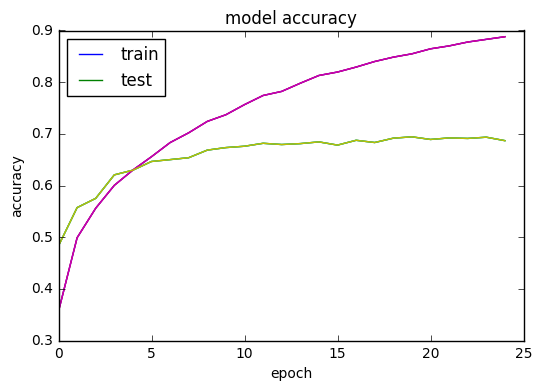

In [61]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

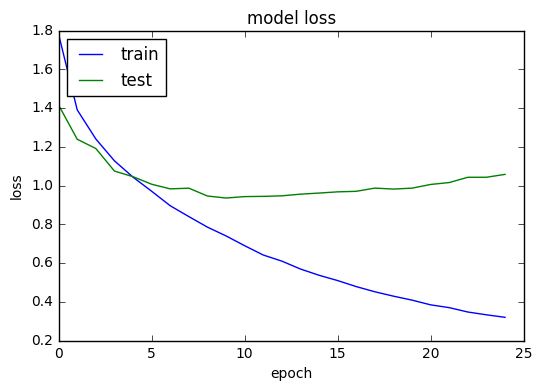

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Analysis of simpleCNN
We see that for the most part we dont see much upgrade in validation accuracy while the training accuracy continues to improve. This is a clear sign of overfitting. 

Ways to improve accuracy
1. Image Data Augmentation
2. Deeper Networks Topology
3. Hyper parameter tuning 

# Deeper Network 

In [20]:
def deeper():
    model = Sequential()
    ### Stack 1 - feature map size 32
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3),
                           activation='relu', border_mode='same', init='normal',
                            W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu',
                            border_mode='same', init='normal', W_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    ### Stack 2 - feature map size 64
    model.add(Convolution2D(64, 3, 3, activation='relu',
                           border_mode='same', init='normal', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu',
                           border_mode='same', init='normal', W_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    ### Stack 3 - feature map size 128
    model.add(Convolution2D(128, 3, 3, activation='relu',
                           border_mode='same', init='normal', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu',
                           border_mode='same', init='normal', W_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    ### Stack 4 - Fully connected layer
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', init='normal', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', init='normal', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adagrad',
                 metrics=['accuracy'])
    print model.summary()
    
    return model

In [21]:
deeperCNN = deeper()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_25 (Convolution2D) (None, 32, 32, 32)    896         convolution2d_input_5[0][0]      
____________________________________________________________________________________________________
dropout_21 (Dropout)             (None, 32, 32, 32)    0           convolution2d_25[0][0]           
____________________________________________________________________________________________________
convolution2d_26 (Convolution2D) (None, 32, 32, 32)    9248        dropout_21[0][0]                 
____________________________________________________________________________________________________
maxpooling2d_13 (MaxPooling2D)   (None, 16, 16, 32)    0           convolution2d_26[0][0]           
___________________________________________________________________________________________

In [22]:
# Recording the history as we train
history = deeperCNN.fit(X_train,  y_train,
                        validation_data=(X_test, y_test),
                        nb_epoch=25,
                        batch_size=64,
                        verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
17s - loss: 2.3155 - acc: 0.0999 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 2/25
16s - loss: 1.9385 - acc: 0.2703 - val_loss: 1.4929 - val_acc: 0.4513
Epoch 3/25
16s - loss: 1.4146 - acc: 0.4847 - val_loss: 1.2692 - val_acc: 0.5380
Epoch 4/25
16s - loss: 1.1973 - acc: 0.5699 - val_loss: 1.3162 - val_acc: 0.5407
Epoch 5/25
16s - loss: 1.0415 - acc: 0.6310 - val_loss: 1.0322 - val_acc: 0.6334
Epoch 6/25
16s - loss: 0.9211 - acc: 0.6743 - val_loss: 1.1647 - val_acc: 0.6121
Epoch 7/25
16s - loss: 0.8273 - acc: 0.7076 - val_loss: 0.8837 - val_acc: 0.6868
Epoch 8/25
16s - loss: 0.7489 - acc: 0.7361 - val_loss: 0.8399 - val_acc: 0.7072
Epoch 9/25
16s - loss: 0.6849 - acc: 0.7580 - val_loss: 0.8400 - val_acc: 0.7058
Epoch 10/25
16s - loss: 0.6186 - acc: 0.7804 - val_loss: 0.8401 - val_acc: 0.7128
Epoch 11/25
16s - loss: 0.5674 - acc: 0.7998 - val_loss: 0.8111 - val_acc: 0.7274
Epoch 12/25
16s - loss: 0.5158 - acc: 0.8177 - val_loss: 

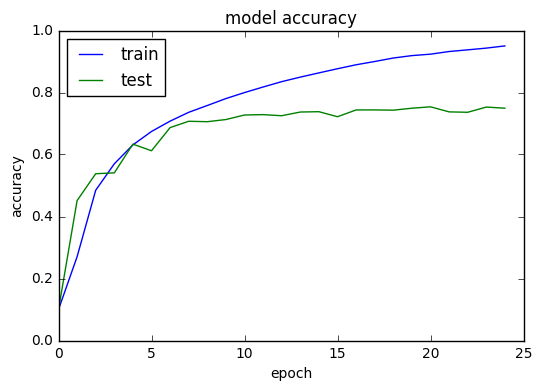

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

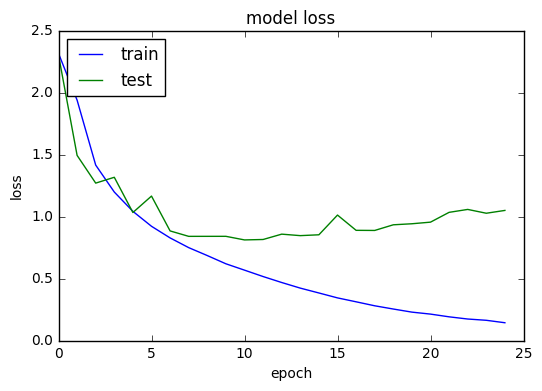

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Analysis of deeperCNN
we already see a great improvement in accuracy with the use of a more complex model. We achived an accuracy of 74% on the test data witht the deeperCNN which 6% higher than the the accuracy achived my simpleCNN.

Although it seems that there is not much actual learning achived beyound epoch 10. The validation accuracy and loss plateau around 74-75% after epoch 10. Infact we see that the validation loss starts to increase again while the training loss continues to improve.

It is obvious that we are over training and over fitting on the test data. This can be dealt with by using early stoping and terminating the training when the validation accuracy dosent improve for a certain number of epochs.

A problem with this method is that we might end up training the network for very few epochs. This means that network dosent get to see the data enough times and hence will not be able to capture most of the interesting patterns, hindering learning.

We can try to augment the data inorder to add more diverse training samples to the data. This will allow the network to be more robust to simple transformations in the image during validation.

Types of Image Augmentation
1. Feature-wise standardization
2. ZCA whitening
3. Random rotation, shifts, shear and flip
4. Dimensioin reordering

# Data Augmentation

In [1]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

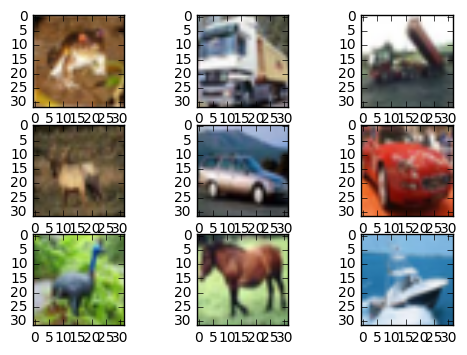

In [10]:
# Images to consider while comparision
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

# Feature Standardization

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

feature_wise_standardization = ImageDataGenerator(featurewise_center=True, 
                            featurewise_std_normalization=True)
feature_wise_standardization.fit(X_train)

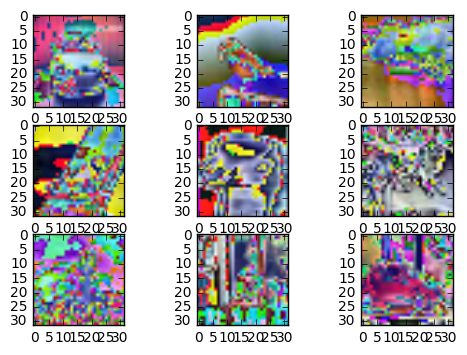

In [13]:
for X_batch, y_batch in feature_wise_standardization.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

# ZCA Whitening

In [14]:
zca_whitening = ImageDataGenerator(zca_whitening=True)
zca_whitening.fit(X_train)

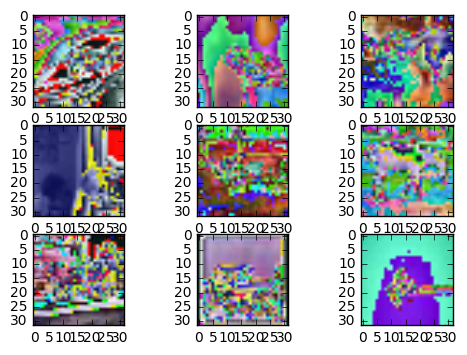

In [20]:
for X_batch, y_batch in feature_wise_standardization.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

# Random Rotation

In [16]:
random_rotation = ImageDataGenerator(rotation_range=90)
random_rotation.fit(X_train)

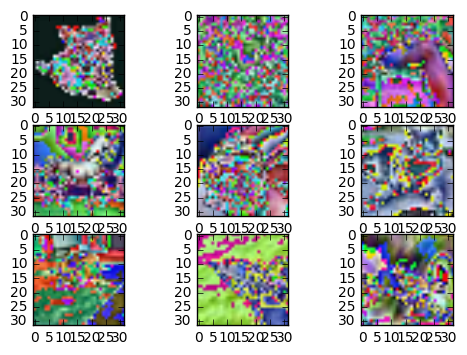

In [17]:
for X_batch, y_batch in feature_wise_standardization.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break